<a href="https://colab.research.google.com/github/ianravisingh/Tensorflow-2.0/blob/main/TF2_0_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(tf.__version__)

2.15.0


In [72]:
# load the data
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
print("X_train shape: ", X_train.shape)

X_train shape:  (60000, 28, 28)


In [73]:
# build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [74]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
# train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2969 - accuracy: 0.9126 - val_loss: 0.1363 - val_accuracy: 0.9590
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1455 - accuracy: 0.9567 - val_loss: 0.1059 - val_accuracy: 0.9683
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1102 - accuracy: 0.9662 - val_loss: 0.0875 - val_accuracy: 0.9724
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0914 - accuracy: 0.9718 - val_loss: 0.0781 - val_accuracy: 0.9755
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0777 - accuracy: 0.9752 - val_loss: 0.0742 - val_accuracy: 0.9784
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0665 - accuracy: 0.9794 - val_loss: 0.0713 - val_accuracy: 0.9790
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0577 - accuracy: 0.9815 - val_loss: 0.0768 - val_accuracy:

### 1875 are the batches, every batch has 32 images as default batch size is 32. So 1875x32=60,000.

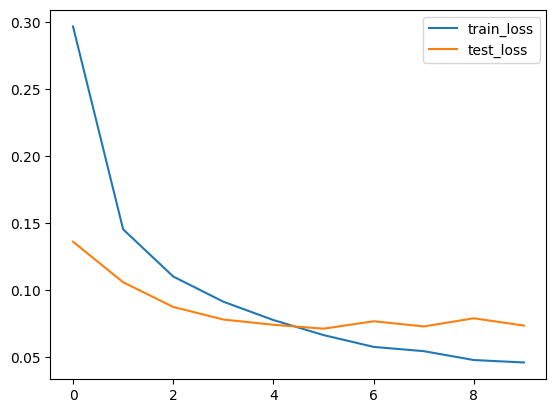

In [76]:
# plot the losses
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='test_loss')
plt.legend()
plt.show()

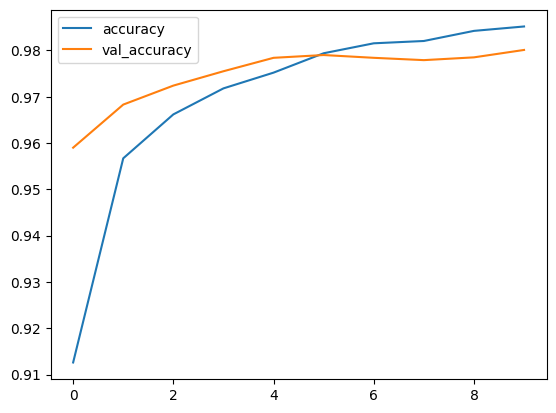

In [77]:
# accuracy plot
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [78]:
# evaluate the model
eval_result = model.evaluate(X_test, y_test)
print(eval_result)
print("Loss: ",eval_result[0])
print(f'Accuracy: {eval_result[1]:.02f}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.0736 - accuracy: 0.9801
[0.07357700914144516, 0.9800999760627747]
Loss:  0.07357700914144516
Accuracy: 0.98%


313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[ 968    1    3    0    1    0    4    1    2    0]
 [   0 1125    3    1    0    0    2    0    4    0]
 [   2    1 1018    0    2    0    1    3    4    1]
 [   1    0   10  982    0    8    0    5    4    0]
 [   0    0    3    0  971    0    3    0    1    4]
 [   2    0    0    5    1  874    3    1    5    1]
 [   4    2    1    1    5    6  938    0    1    0]
 [   2    4   12    2    1    0    0 1003    0    4]
 [   4    1    4    3    3    3    0    5  948    3]
 [   2    6    0    4   15    3    0    5    0  974]]


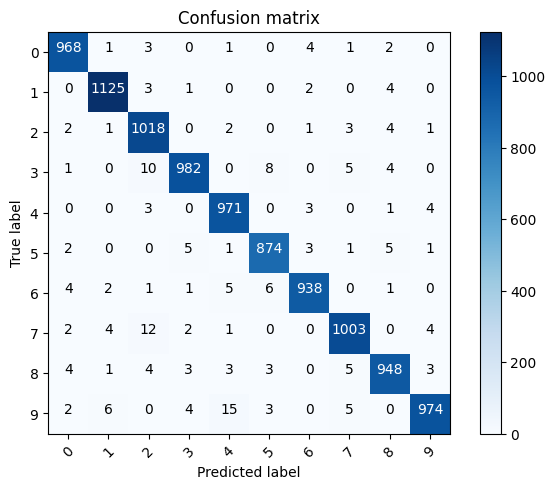

In [79]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.

In [80]:
# predict
y_hat = model.predict(X_test).argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


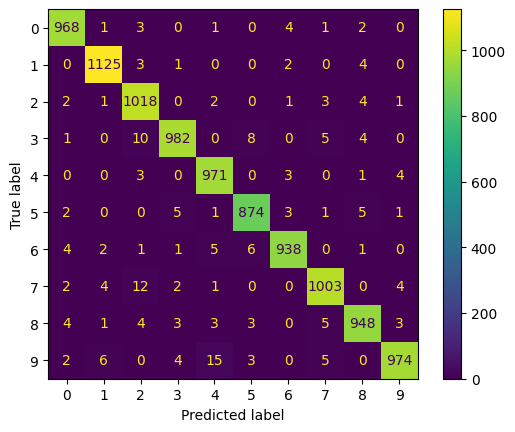

In [81]:
# alternative to above plot_confusion_matrix() method
cf = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(cf)
disp.plot()
plt.show()

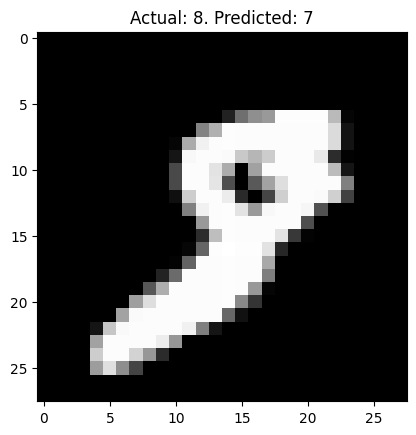

In [82]:
# Show some misclassified examples
misclassified_idx = np.where(y_test!=y_hat)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title(f'Actual: {y_test[i]}. Predicted: {y_hat[i]}')
plt.show()